# OBJECTIVE:

# To apply Naive Bayes on Amazon food reviews

In [ ]:
import pickle
def savetofile(obj,filename):
   pickle.dump(obj,open(filename,"wb"))
def openfromfile(filename):
   temp = pickle.load(open(filename,"rb"))
   return temp

In [3]:
#loading the data of 100k from saved file
final_100000 = openfromfile("f_string.pickle")
final_100000.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,pos,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,pos,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
2,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,pos,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
3,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,pos,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...
4,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,pos,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...


In [4]:
#Making the index from 0 to end
final_100000= final_100000.reset_index(drop=True)
final_100000.shape

(100000, 11)

In [5]:
#In the Score column, assigning positive as 1 and negative as 0
def pos_neg(x):
    if x == 'pos':
        return 1
    return 0
final_100000['Score'] = final_100000['Score'].map(pos_neg)

In [6]:
savetofile(final_100000,"f2_string.pickle")

In [7]:
final_100000 = openfromfile("f2_string.pickle")

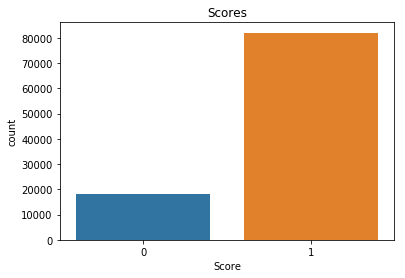

1    81998
0    18002
Name: Score, dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
ax=plt.axes()
sns.countplot(final_100000.Score,ax=ax)
plt.title("Scores")
plt.show()
final_100000['Score'].value_counts()

In [32]:
#storing cleanedtext into x and Score into y
x = final_100000['CleanedText']
y = final_100000['Score']
#Splitting the data into train and test data with 70:30 ratio.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, shuffle=False)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(70000,)
(30000,)
(70000,)
(30000,)


# 1.BOW:

In [33]:
#Bag of words:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
#vectorizing the train data,cross validate data and test data.
bow1 = count_vect.fit_transform(X_train)
bow2 = count_vect.transform(X_test)
#preprocessing the train data,cross validate data and test data.
from sklearn import preprocessing
Train_BOW_X = preprocessing.normalize(bow1)
Test_BOW_X = preprocessing.normalize(bow2)

In [34]:
savetofile(Train_BOW_X,"Tr_BOW_X.pickle")
savetofile(Test_BOW_X,"Te_BOW_X.pickle")

Finding the best 'alpha' using maximum f1 score:

In [35]:
#Using minimum false positive values to find best alpha
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
alpha=[1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001]
f1_score_=[]
#finding the f1_score values for the taken alpha values
for i in alpha:
   nb = MultinomialNB(alpha=i) 
   nb.fit(Train_BOW_X, Y_train)
   predict=nb.predict(Test_BOW_X)
   k= f1_score(Y_test,predict)
   f1_score_.append(k)
print("list of f1 score value for given alpha values:",f1_score_)
#finding the index of maximum f1 score value which is the index of best alpha
print("maximum f1 score value",max(f1_score_))
a=f1_score_.index(max(f1_score_)) 
print("best alpha index value:",a)
best_alpha=alpha[a]
print("best alpha value:",best_alpha)

list of f1 score value for given alpha values: [0.89263220110452335, 0.89422044503683951, 0.901311481543844, 0.90276006900172501, 0.90362577493894425, 0.90353250657647488, 0.90315548121558376, 0.90296389572800573, 0.90241197150000929, 0.90223358652327601, 0.90148580026330638]
maximum f1 score value 0.903625774939
best alpha index value: 4
best alpha value: 0.01


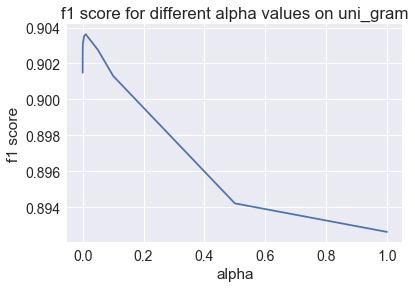

In [36]:
#ploting the graph between alpha values and f1 score
alpha=[1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001]
sns.set_style("darkgrid")
plt.plot(alpha,f1_score_)
plt.xlabel("alpha")
plt.ylabel("f1 score")
plt.title("f1 score for different alpha values on uni_gram")
plt.show()

Accuracy on test set: 82.900%
Precision on test set: 0.828
Recall on test set: 0.995
F1-Score on test set: 0.904
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



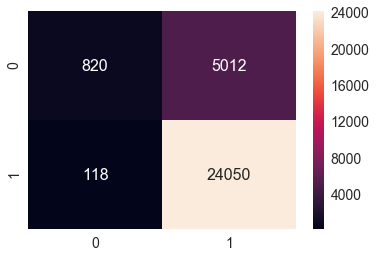

In [37]:
#Using the best alpha to find the accuracy,precision,recall,f1 score.
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#Testing Accuracy on Test data with alpha value 0.01
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=0.01)
nb.fit(Train_BOW_X, Y_train)
y_pred = nb.predict(Test_BOW_X)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [38]:
#finding the important  positive and negative featues
def naive_bayes_important_features_(vectorizer,clf,n=10):
 feature_names =vectorizer.get_feature_names()
 coefs_with_neg_fea = sorted(zip(clf.feature_count_[0], feature_names),reverse=True)[:n]
 coefs_with_pos_fea = sorted(zip(clf.feature_count_[1], feature_names),reverse=True)[:n]
 top = zip(coefs_with_pos_fea[:n], coefs_with_neg_fea[:n])
 class_labels = clf.classes_
 print("\t\t\tPositive\t\t\t\t\t\tNegative")
 print("________________________________________________________________________________________________")
 for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%d\t%.4f\t%-15s\t\t\t\t%d\t%.4f\t%-15s" % (class_labels[1],coef_1, fn_1, class_labels[0],coef_2, fn_2)) 
        
naive_bayes_important_features_(count_vect,nb,n=10)
        

			Positive						Negative
________________________________________________________________________________________________
	1	3456.4506	tast           				0	1017.7215	tast           
	1	3402.9917	great          				0	908.3068	like           
	1	3292.5174	like           				0	708.7628	product        
	1	3178.6701	good           				0	620.8217	flavor         
	1	3130.1245	love           				0	568.8728	good           
	1	2723.8538	flavor         				0	527.2448	one            
	1	2542.8552	product        				0	488.4329	would          
	1	2494.5435	tea            				0	434.4943	tri            
	1	2341.7372	use            				0	366.5144	use            
	1	2226.0135	one            				0	361.1146	get            


# 2.Tfidf:

In [39]:
#TFIDF:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
#vectorizing the train data,cross validate data and test data.
tfidf1 = tfidf.fit_transform(X_train)
tfidf2 = tfidf.transform(X_test)
#preprocessing the train data,cross validate data and test data.
from sklearn import preprocessing
Train_TFIDF_X = preprocessing.normalize(tfidf1)
Test_TFIDF_X = preprocessing.normalize(tfidf2)

In [40]:
savetofile(Train_TFIDF_X,"Tr_TFIDF_X.pickle")
savetofile(Test_TFIDF_X,"Te_TFIDF_X.pickle")

Finding the best 'alpha' using maximum f1 score value:

In [41]:
#Using minimum false positive values to find best alpha
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
alpha=[1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001]
f1_score_=[]
#finding the f1_score values for the taken alpha values
for i in alpha:
   nb = MultinomialNB(alpha=i) 
   nb.fit(Train_TFIDF_X, Y_train)
   predict=nb.predict(Test_TFIDF_X)
   k= f1_score(Y_test,predict)
   f1_score_.append(k)
print("list of f1 score for given alpha values:",f1_score_)
#finding the index of maximum f1 score value which is the index of best alpha
print("maximum f1 score value",max(f1_score_))
a=f1_score_.index(max(f1_score_)) 
print("best alpha index value:",a)
best_alpha=alpha[a]
print("best alpha value:",best_alpha)

list of f1 score for given alpha values: [0.89345490188825805, 0.89671195702682105, 0.90439500405026096, 0.90574452003023442, 0.90473394078311764, 0.90407169518179575, 0.90326249739341435, 0.90306925249767767, 0.90238027501185392, 0.90213040426460267, 0.90169440069825235]
maximum f1 score value 0.90574452003
best alpha index value: 3
best alpha value: 0.05


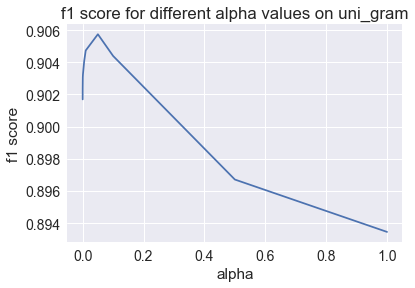

In [42]:
#ploting the graph between alpha values and f1 score
alpha=[1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001]
sns.set_style("darkgrid")
plt.plot(alpha,f1_score_)
plt.xlabel("alpha")
plt.ylabel("f1 score")
plt.title("f1 score for different alpha values on uni_gram")
plt.show()

Accuracy on test set: 83.373%
Precision on test set: 0.834
Recall on test set: 0.992
F1-Score on test set: 0.906
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



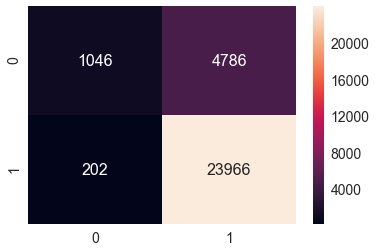

In [43]:
#Using the best alpha to find the accuracy,precision,recall,f1 score.
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#Testing Accuracy on Test data with alpha value of 0.05
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=0.05)
nb.fit(Train_TFIDF_X, Y_train)
y_pred = nb.predict(Test_TFIDF_X)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(Y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(Y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(Y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(Y_test, y_pred)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")
df_cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [44]:
#finding the important  positive and negative featues
def naive_bayes_important_features_(vectorizer,clf,n=10):
 feature_names =vectorizer.get_feature_names()
 coefs_with_neg_fea = sorted(zip(clf.feature_count_[0], feature_names),reverse=True)[:n]
 coefs_with_pos_fea = sorted(zip(clf.feature_count_[1], feature_names),reverse=True)[:n]
 top = zip(coefs_with_pos_fea[:n], coefs_with_neg_fea[:n])
 class_labels = clf.classes_
 print("\t\t\tPositive\t\t\t\t\t\tNegative")
 print("________________________________________________________________________________________________")
 for (coef_1, fn_1), (coef_2, fn_2) in top:
        print("\t%d\t%.4f\t%-15s\t\t\t\t%d\t%.4f\t%-15s" % (class_labels[1],coef_1, fn_1, class_labels[0],coef_2, fn_2)) 
        
naive_bayes_important_features_(tfidf,nb,n=10)

			Positive						Negative
________________________________________________________________________________________________
	1	1769.6222	tea            				0	462.8113	tast           
	1	1754.0987	great          				0	418.9595	like           
	1	1621.1198	love           				0	360.4168	product        
	1	1594.2615	tast           				0	317.5376	flavor         
	1	1573.3233	good           				0	294.8088	would          
	1	1526.1204	like           				0	273.8242	good           
	1	1413.1666	flavor         				0	268.6787	one            
	1	1354.7547	product        				0	248.5977	tea            
	1	1246.7588	use            				0	230.0386	tri            
	1	1164.9163	one            				0	218.7228	coffe          


**Naive-Bayes with different text classification:**

|          |sample size|Optimal_alpha|Test accuracy |precision     |recall        |f1-score    |                         
|----------|-----------|-------------|--------------|--------------|--------------|------------| 
|          |           |             |              |              |              |            |
|BOW       | 100k      |   0.01      |   82.90%     |    0.828     |    0.995     |  0.904     |
|TF-IDF    | 100k      |   0.05      |   83.37%     |    0.834     |    0.992     |  0.906     |

**Observation:**
              By comparing above table, for our data TFIDF with Naive-bayes is working better.
    

Step by step procedure:

    1.Firstly 100k rows were taken and splitted into 70:30 as 70k rows for train data and 30k rows for test data.    
    2.Then converted these train and test data into vectors by using Bag of words and Tfidf.
    3.Now applied multinomial naive bayes for the trained data to find the optimum alpha value.
    4.This is done with finding the maximum f1 score value.
    5.Using the obtained alpha value trained data is again trained and then test data is used to find the metrics.
    6.Later used the vectorizer and classifier to find the important features 